In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px


In [3]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
df = pd.read_csv(url)


In [4]:
df['date'] = pd.to_datetime(df['date'])
df = df[df['total_vaccinations'].notna()]
df = df[df['iso_code'].apply(lambda x: len(x) == 3)]
df = df.groupby(['location', 'date']).agg({
    'total_vaccinations_per_hundred': 'max',
    'people_fully_vaccinated_per_hundred': 'max',
    'daily_vaccinations_per_million': 'mean'
}).reset_index()


In [5]:
latest = df.sort_values('date').groupby('location').tail(1)
latest = latest.dropna()

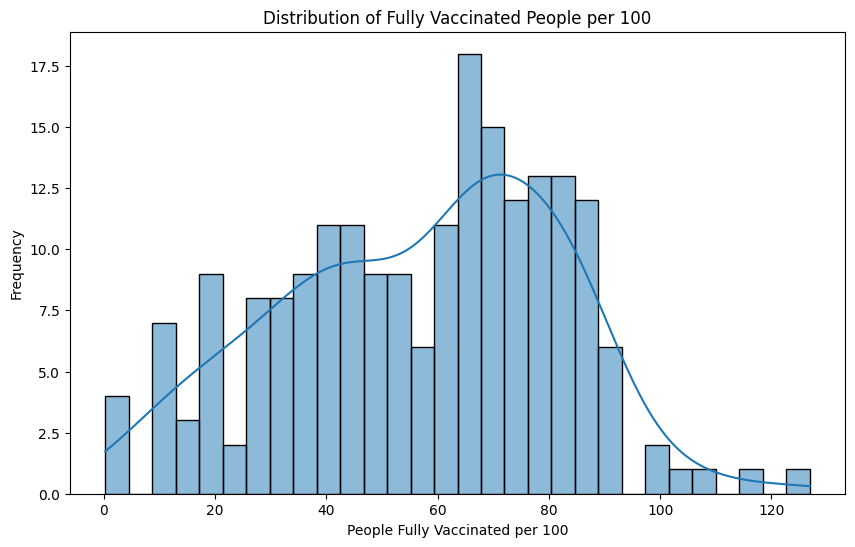

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(latest['people_fully_vaccinated_per_hundred'], bins=30, kde=True)
plt.title("Distribution of Fully Vaccinated People per 100")
plt.xlabel("People Fully Vaccinated per 100")
plt.ylabel("Frequency")
plt.show()


In [7]:
fig = px.scatter(latest, x='total_vaccinations_per_hundred', y='people_fully_vaccinated_per_hundred', hover_name='location')
fig.update_layout(title="Total vs Fully Vaccinated per 100")
fig.show()

In [8]:
X = latest[['total_vaccinations_per_hundred', 'daily_vaccinations_per_million']]
y = latest['people_fully_vaccinated_per_hundred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [9]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


MSE: 65.23387848439015
R^2 Score: 0.8853079719687914


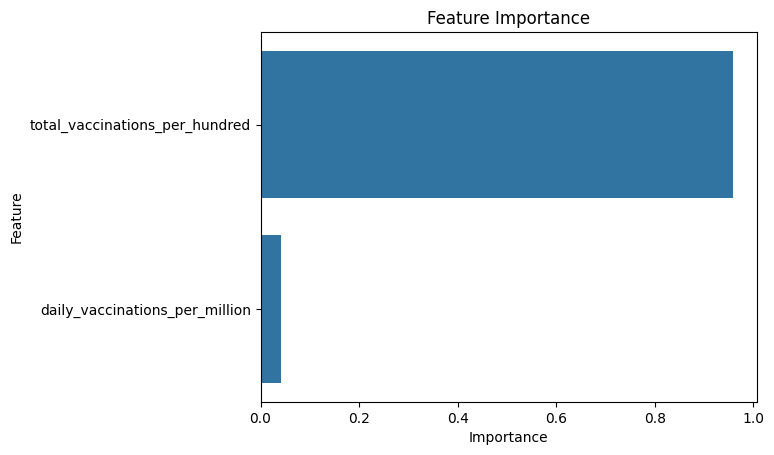

In [10]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance")
plt.show()


In [11]:
import joblib
joblib.dump(model, 'vaccination_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [12]:
print("\nTop Insights:")
print("- Countries with higher total vaccinations per hundred tend to have higher fully vaccinated rates.")
print("- Daily vaccination rate is a significant factor in full vaccination coverage.")



Top Insights:
- Countries with higher total vaccinations per hundred tend to have higher fully vaccinated rates.
- Daily vaccination rate is a significant factor in full vaccination coverage.
